In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

df = pd.read_csv("Korean.csv") 
df = df[["Title","Year","Genre","Rating"]]
df['Rating'] = pd.to_numeric(df['Rating'],errors='coerce')
res = []
for i in range(len(df)): 
    q = str(df["Year"][i])
    if "an" in q: 
        continue
    if "I" in q:
        q = q.split(" ")[1]
        if len(q) <= 8: 
           df["Year"][i] = q[1:5],q[1:5]
        else: 
           df["Year"][i] = q[1:5],q[6:10]
    elif len(q)<=8:
        df["Year"][i] = q[1:5],q[1:5]
    else:
        df["Year"][i] = q[1:5],q[6:10]
    df["Genre"][i] = df["Genre"][i].split(",")
    for z in range(len(df["Genre"][i])):
        for m in range(int(df["Year"][i][0]),int(df["Year"][i][1])+1):
            res.append([df["Genre"][i][z],m,df["Rating"][i]])
        


/var/folders/tr/sjr4bh_d1sj6dyxjdxkhc1680000gn/T/ipykernel_63559/191821176.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"][i] = q[1:5],q[1:5]
/var/folders/tr/sjr4bh_d1sj6dyxjdxkhc1680000gn/T/ipykernel_63559/191821176.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Genre"][i] = df["Genre"][i].split(",")
/var/folders/tr/sjr4bh_d1sj6dyxjdxkhc1680000gn/T/ipykernel_63559/191821176.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [18]:
for i in res: 
    rk = pd.DataFrame(res,columns=["Genre","Year","Rating"])

rk = rk[rk['Genre'].isin(['Drama','Comedy','Romance','Thriller','Fantasy'])] 
rk = rk[rk['Year']>=2016] 
rk = rk[rk['Year']<=2021]

In [76]:
df_count = pd.DataFrame(rk.groupby(['Genre','Year']).count())
df_count = df_count.reset_index() 
df_count = df_count.rename(columns={'Rating':'Count'})
df_count

,Genre,Year,Count
0,Comedy,2016,43
1,Comedy,2017,40
2,Comedy,2018,36
3,Comedy,2019,30
4,Comedy,2020,38
5,Comedy,2021,34
6,Drama,2016,53
7,Drama,2017,47
8,Drama,2018,58
9,Drama,2019,54


In [108]:
df_mean = pd.DataFrame(rk.groupby(["Genre","Year"]).mean())
df_mean = df_mean.reset_index()
df_mean

,Genre,Year,Rating
0,Comedy,2016,7.481395
1,Comedy,2017,7.482500
2,Comedy,2018,7.411111
3,Comedy,2019,7.493333
4,Comedy,2020,7.573684
5,Comedy,2021,7.482353
6,Drama,2016,7.435849
7,Drama,2017,7.195745
8,Drama,2018,7.315517
9,Drama,2019,7.572222


In [79]:
type(df_count)


pandas.core.frame.DataFrame

Genre,Comedy_x,Drama_x,Fantasy_x,Romance_x,Thriller_x,Comedy_y,Drama_y,Fantasy_y,Romance_y,Thriller_y
Year,,,,,,,,,,
2016,43.0,53.0,NaN,3.0,1.0,7.481395,7.435849,NaN,6.333333,7.4
2017,40.0,47.0,4.0,1.0,NaN,7.482500,7.195745,6.8250,6.400000,NaN
2018,36.0,58.0,4.0,5.0,NaN,7.411111,7.315517,6.9750,6.820000,NaN
2019,30.0,54.0,2.0,5.0,1.0,7.493333,7.572222,7.1500,7.140000,7.6
2020,38.0,27.0,8.0,1.0,NaN,7.573684,7.566667,7.6875,7.900000,NaN
2021,34.0,30.0,2.0,5.0,NaN,7.482353,7.790000,7.2500,7.840000,NaN


<Figure size 1080x576 with 0 Axes>

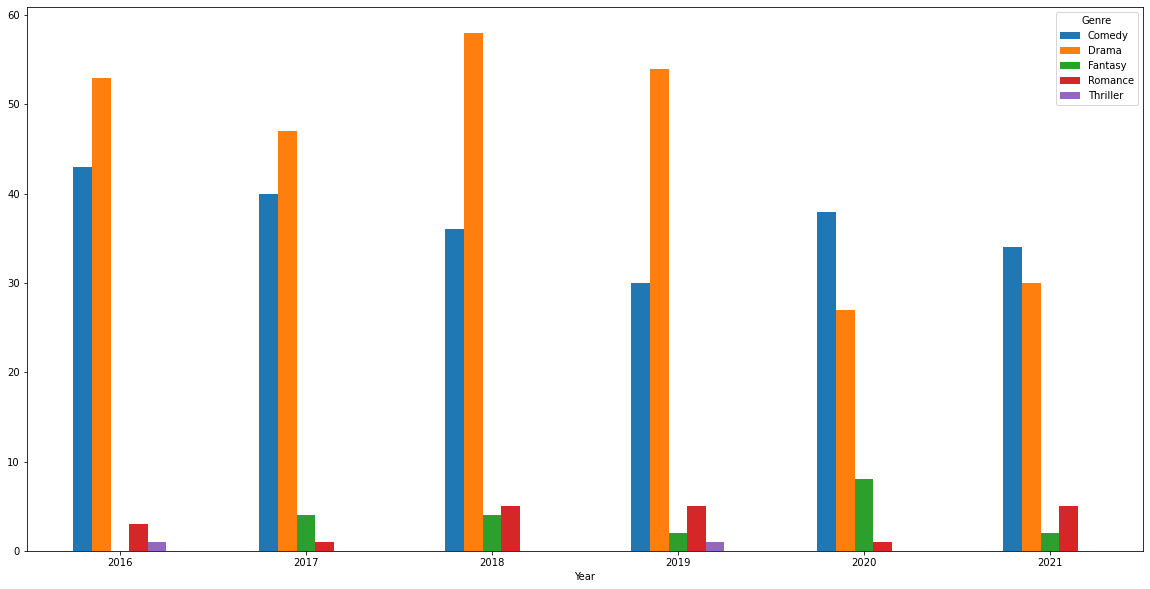

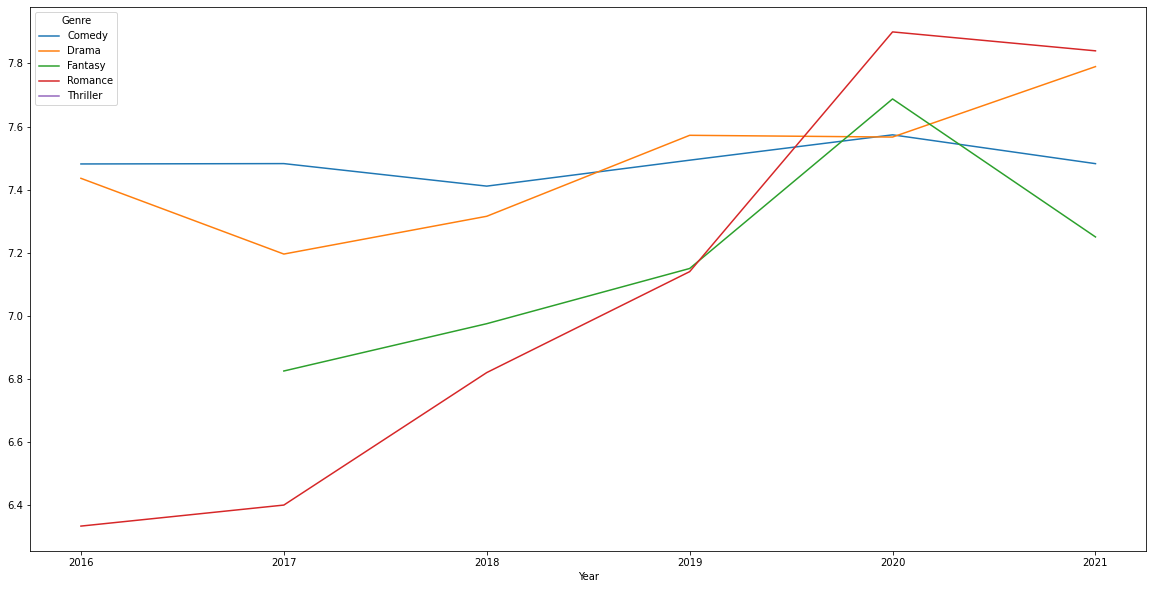

In [146]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(15,8))
df_total = pd.merge(df_count,df_mean,on=['Genre','Year'])
df_total = df_total.rename(columns={'Rating':'Mean'})

# ax = sns.lineplot(x="Year", y="Mean", hue="Genre", data=df_total)
# df = sns.barplot(x="Year", y="Count", hue="Genre", data=df_total)

df = df_total.pivot(index='Year', columns='Genre', values='Count')
df.plot(kind='bar',figsize=(20,10),rot=0)

df2 = df_total.pivot(index='Year', columns='Genre', values='Mean')
df2.plot(kind='line',figsize=(20,10),rot=0)
